<a href="https://colab.research.google.com/github/astrodatos/Clase4/blob/master/Actividad_4_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CD2201: Ciencia de Datos en Astronomía**
**Profesores:** Pía Cortés, Daniela Barrientos, Matías Mattamala, Matías Suazo

##**Actividad Clase 4 - Extragaláctico**

###**Objetivos:**
1.   Lectura de archivos desde **Google Drive** personal
2.   Utilización de **astropy** en la apertura de archivos *FITS*
3.   Manejo de los paquetes **numpy** y **pandas** para el uso de arreglos y grandes bases de datos.
4.   Repasar **matplotlib** para la creación de gráficos.



#**Diagrama color-magnitud para estrellas**
En las clases anteriores vimos que las estrellas se distribuyen de una forma muy particular en un diagrama Luminosidad vs Temperatura. Dicho diagrama se llama diagrama Hertprung-Russell. 

<img src="https://upload.wikimedia.org/wikipedia/commons/6/6b/HRDiagram.png" alt="Simply Easy Learning" width="1000"
         height="800">
 
También vimos que muchas veces se carece de estos parámetros, sin embargo, la utilización de un diagrama Color-Magnitud suele ser equivalente.


#**Diagrama color-magnitud para galaxias**

El objetivo de esta actividad es identificar si hay existe algún tipo de distribución especial para las galaxias, tal como lo es para las estrellas.

Con este propósito, trabajaremos en el creación de un diagrama color-magnitud para galaxias. **NOTA:** El concepto de temperatura de una galaxia no existe, así que no es posible hacer un diagrama Luminosidad-Temperatura.

Para este propósito trabajaremos con datos del Sloan Digital Sky Survey (SDSS), data release 16 (DR16). Recuerden que el SDSS es un proyecto de investigación que ha mapeado el cielo en búsqueda de objetos distantes. Las observaciones se encuentran en el espectro visible e infrarrojo, comenzó el año 2000, y ha tenido varias mejoras a través del tiempo.

<img src="https://www.sdss.org/wp-content/uploads/2014/06/orangepie.jpg" width="600"
         height="600">



###**Paso 1: Montar el disco**

Los datos que utilizaremos han sido provistos a través de material docente. Es de su responsabilidad subirlo a su Google Drive personal.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


###**Paso 2: Cargar paquetes necesarios**

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from astropy.table import Table

###**Paso 3: Lectura de los archivos**
Los archivos fits **NO SÓLO** se utilizan en el almacenamiento de imágenes, si no que también para almacenar información tabulada. La ventaja radica en la ligereza del archivo. La fotometría de las galaxias a analizar se encuentra en dos archivos distintos llamados **photometry1.fits** y **photometry2.fits**. Adicionalmente, la información con los redshifts de cada galaxia se encuentra en los archivos **redshift1.fits** y **redshift2.fits**.

In [ ]:
#Cargamos en los enlaces que contienen nuestros archivos
enlace1 = '/content/drive/My Drive/photometry1.fits'
enlace2 = '/content/drive/My Drive/photometry2.fits'
enlace3 = '/content/drive/My Drive/redshift1.fits'
enlace4 = '/content/drive/My Drive/redshift2.fits'

#Leemos los datos como tablas de astropy, recordar que hay que especificar que estamos leyendo archivos fits
dat1 = Table.read(enlace1,format='fits')
dat2 = Table.read(enlace2,format='fits')
dat3 = Table.read(enlace3,format='fits')
dat4 = Table.read(enlace4,format='fits')

#Transformamos las tablas de astropy en dataframes de pandas
ph1 = dat1.to_pandas()
ph2 = dat2.to_pandas()
z1 = dat3.to_pandas()
z2 = dat4.to_pandas()


Revisemos que información proveen estos archivos fits.

In [ ]:
ph1

objid          ra  ...          i          z
0       1237674475439391293  174.434089  ...  19.874660  19.400928
1       1237674475439653429  175.581724  ...  19.722954  19.290579
2       1237661970118476705  200.266640  ...  19.969360  19.382036
3       1237655106763948418  170.231015  ...  19.407616  18.899120
4       1237664285098181114  133.065839  ...  18.298597  17.837732
...                     ...         ...  ...        ...        ...
185880  1237650369939833052  168.057572  ...  19.429737  18.890257
185881  1237650369944683638  179.134926  ...  18.913021  18.556267
185882  1237669767085293935   11.501684  ...  19.057663  18.639196
185883  1237650369936556831  160.599336  ...  19.434641  18.977377
185884  1237680479804261325    0.997588  ...  19.332430  18.760019

[185885 rows x 8 columns]

In [ ]:
ph2

objid          ra  ...          i          z
0       1237674475439784445  176.197717  ...  19.828569  19.431967
1       1237674475438997608  172.483769  ...  14.864243  14.537233
2       1237661351633813606  186.119505  ...  16.028318  15.673276
3       1237658607147417824  187.392055  ...  17.098305  16.808071
4       1237649961385918927   60.412184  ...  18.041727  17.633133
...                     ...         ...  ...        ...        ...
130275  1237661384381038860  140.122571  ...  17.193829  16.861528
130276  1237650369941536883  171.854982  ...  16.533318  16.106508
130277  1237650369943699684  176.800098  ...  16.820478  16.454479
130278  1237650369945141401  180.144997  ...  17.394892  17.037815
130279  1237661384385691870  152.153537  ...  14.608419  14.355526

[130280 rows x 8 columns]

In [ ]:
z1

objid  redshift
0       1237674475439391293  0.509239
1       1237674475439653429  0.475017
2       1237661970118476705  0.574864
3       1237655106763948418  0.583706
4       1237664285098181114  0.338474
...                     ...       ...
185880  1237650369939833052  0.565857
185881  1237650369944683638  0.440233
185882  1237669767085293935  0.479855
185883  1237650369936556831  0.515428
185884  1237680479804261325  0.629440

[185885 rows x 2 columns]

In [ ]:
z2

objid  redshift
0       1237674475439784445  0.567457
1       1237674475438997608  0.060337
2       1237661351633813606  0.086945
3       1237658607147417824  0.163283
4       1237649961385918927  0.254734
...                     ...       ...
130275  1237661384381038860  0.097239
130276  1237650369941536883  0.143902
130277  1237650369943699684  0.107512
130278  1237650369945141401  0.187212
130279  1237661384385691870  0.055792

[130280 rows x 2 columns]

Como vemos, los dataframes contienen toda la información necesaria para hacer un diagrama color-magnitud, tenemos la posición de cada galaxia, además de su photometría en cinco diferentes bandas, también tenemos el redshift de cada una, la cual podemos utilizar para estimar distancias.

##**Paso 4: Unificación de tablas**
Ahora vamos a pasar a unificar todas las tablas, pues resulta más sencillo trabajar con un solo dataframe. En primer lugar, le añadiremos los redshifts guardados en los dataframes **z1** y **z2** a los dataframes **ph1** y **ph2**. Utilizaremos la función *merge* y utilizaremos la columna **objid** como identificador para asegurarnos de que cada galaxia tenga su correcto redshift.

In [ ]:
#Para unir dos dataframes que tienen la misma información 
df1 = pd.merge(ph1,z1,on='objid')
df2 = pd.merge(ph2,z2,on='objid')

In [ ]:
df1

objid          ra  ...          z  redshift
0       1237674475439784445  176.197717  ...  19.431967  0.567457
1       1237674475438997608  172.483769  ...  14.537233  0.060337
2       1237661351633813606  186.119505  ...  15.673276  0.086945
3       1237658607147417824  187.392055  ...  16.808071  0.163283
4       1237649961385918927   60.412184  ...  17.633133  0.254734
...                     ...         ...  ...        ...       ...
130279  1237661384381038860  140.122571  ...  16.861528  0.097239
130280  1237650369941536883  171.854982  ...  16.106508  0.143902
130281  1237650369943699684  176.800098  ...  16.454479  0.107512
130282  1237650369945141401  180.144997  ...  17.037815  0.187212
130283  1237661384385691870  152.153537  ...  14.355526  0.055792

[130284 rows x 9 columns]

In [ ]:
df2

objid          ra  ...          z  redshift
0       1237674475439784445  176.197717  ...  19.431967  0.567457
1       1237674475438997608  172.483769  ...  14.537233  0.060337
2       1237661351633813606  186.119505  ...  15.673276  0.086945
3       1237658607147417824  187.392055  ...  16.808071  0.163283
4       1237649961385918927   60.412184  ...  17.633133  0.254734
...                     ...         ...  ...        ...       ...
130279  1237661384381038860  140.122571  ...  16.861528  0.097239
130280  1237650369941536883  171.854982  ...  16.106508  0.143902
130281  1237650369943699684  176.800098  ...  16.454479  0.107512
130282  1237650369945141401  180.144997  ...  17.037815  0.187212
130283  1237661384385691870  152.153537  ...  14.355526  0.055792

[130284 rows x 9 columns]

Para juntar los dos nuevos dataframes usamos la función *concat* (de concatenar).

In [ ]:
df = pd.concat([df1, df2])

In [ ]:
df

objid          ra  ...          z  redshift
0       1237674475439391293  174.434089  ...  19.400928  0.509239
1       1237674475439653429  175.581724  ...  19.290579  0.475017
2       1237661970118476705  200.266640  ...  19.382036  0.574864
3       1237655106763948418  170.231015  ...  18.899120  0.583706
4       1237664285098181114  133.065839  ...  17.837732  0.338474
...                     ...         ...  ...        ...       ...
130279  1237661384381038860  140.122571  ...  16.861528  0.097239
130280  1237650369941536883  171.854982  ...  16.106508  0.143902
130281  1237650369943699684  176.800098  ...  16.454479  0.107512
130282  1237650369945141401  180.144997  ...  17.037815  0.187212
130283  1237661384385691870  152.153537  ...  14.355526  0.055792

[316169 rows x 9 columns]

Si se fijan bien los índices estás un poco raros, así que eso lo solucionamos *reseteando* los índices de este nuevo dataframe.

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df

objid          ra  ...          z  redshift
0       1237674475439391293  174.434089  ...  19.400928  0.509239
1       1237674475439653429  175.581724  ...  19.290579  0.475017
2       1237661970118476705  200.266640  ...  19.382036  0.574864
3       1237655106763948418  170.231015  ...  18.899120  0.583706
4       1237664285098181114  133.065839  ...  17.837732  0.338474
...                     ...         ...  ...        ...       ...
316164  1237661384381038860  140.122571  ...  16.861528  0.097239
316165  1237650369941536883  171.854982  ...  16.106508  0.143902
316166  1237650369943699684  176.800098  ...  16.454479  0.107512
316167  1237650369945141401  180.144997  ...  17.037815  0.187212
316168  1237661384385691870  152.153537  ...  14.355526  0.055792

[316169 rows x 9 columns]

##**Paso 4: Determinación de distancias**

Un diagrama color-magnitud (Como el de la primera figura) es un diagrama color-magnitud absoluta. Para determinar la magnitud faltante recordemos que la relación entre la magnitud aparente y la magnitud absoluta es la siguiente, $M = m + 5$ - $ 5 \log d$, donde $M$ es la magnitud absoluta, $m$ es la magnitud aparente y $d$ es la distancia al objecto en parsecs. Para determinar las distancias a las galaxias, utilizamos la ley de Hubble $d = \frac{cz}{H_0}$, donde $c$ es la velocidad de la luz, y $H_0$ es la constante de Hubble.

**HINT:** 

1.   $c$ = 300000 km/s
2.   $H_0$ = 74 (km/s)/Mpc #Megamaser Cosmology Project

Creamos una nueva columna en el dataframe **df**, esta vez va a contener la distancia a la galaxia.

In [ ]:
#Calculo de distancias
#H0 = 74 (km/s)/Mpc Megamaser Cosmology Project
#d = cz/H0
c = 300000 #km/s
H0 = 74 #(km/s)/Mpc
df['distance'] = (c*df['redshift']/H0)*1e6 #el 1e6 es para convertir de Mpc a pc

Si revisamos el dataframe, podemos notar que la columna distance ha sido agregada.

In [ ]:
df

objid          ra  ...       r-i       i-z
0       1237674475439391293  174.434089  ...  0.987513  0.473732
1       1237674475439653429  175.581724  ...  0.915081  0.432375
2       1237661970118476705  200.266640  ...  1.084917  0.587324
3       1237655106763948418  170.231015  ...  1.087791  0.508495
4       1237664285098181114  133.065839  ...  0.618635  0.460865
...                     ...         ...  ...       ...       ...
316164  1237661384381038860  140.122571  ...  0.521439  0.332300
316165  1237650369941536883  171.854982  ...  0.540384  0.426809
316166  1237650369943699684  176.800098  ...  0.418488  0.365999
316167  1237650369945141401  180.144997  ...  0.516981  0.357077
316168  1237661384385691870  152.153537  ...  0.358558  0.252893

[316169 rows x 19 columns]

##**Paso 5: Determinación de magnitudes absolutas**
Con la información que poseemos ya podemos calcular las magnitudes absolutas, la nueva información la guardaremos en diferentes columnas. También aprovechamos de crear las columnas conteniendo diferentes colores.

In [ ]:
#definir magnitudes absolutas
df['Mu'] = df['u'] - 5*np.log10(df['distance']/10.)
df['Mg'] = df['g'] - 5*np.log10(df['distance']/10.)
df['Mr'] = df['r'] - 5*np.log10(df['distance']/10.)
df['Mi'] = df['i'] - 5*np.log10(df['distance']/10.)
df['Mz'] = df['z'] - 5*np.log10(df['distance']/10.)
df['u-g'] = df['u'] - df['g']
df['g-r'] = df['g'] - df['r']
df['r-i'] = df['r'] - df['i']
df['i-z'] = df['i'] - df['z']

In [ ]:
df

objid          ra  ...       r-i       i-z
0       1237674475439391293  174.434089  ...  0.987513  0.473732
1       1237674475439653429  175.581724  ...  0.915081  0.432375
2       1237661970118476705  200.266640  ...  1.084917  0.587324
3       1237655106763948418  170.231015  ...  1.087791  0.508495
4       1237664285098181114  133.065839  ...  0.618635  0.460865
...                     ...         ...  ...       ...       ...
316164  1237661384381038860  140.122571  ...  0.521439  0.332300
316165  1237650369941536883  171.854982  ...  0.540384  0.426809
316166  1237650369943699684  176.800098  ...  0.418488  0.365999
316167  1237650369945141401  180.144997  ...  0.516981  0.357077
316168  1237661384385691870  152.153537  ...  0.358558  0.252893

[316169 rows x 19 columns]

##**Paso 6: Diagramas Color-Magnitud**

Con toda la infomación que el dataframe **df** posee, podemos proceder a crear los diferentes diagramas color-magnitud. Échemos un ojo en el diagrama ($u-g$,$M_g$)

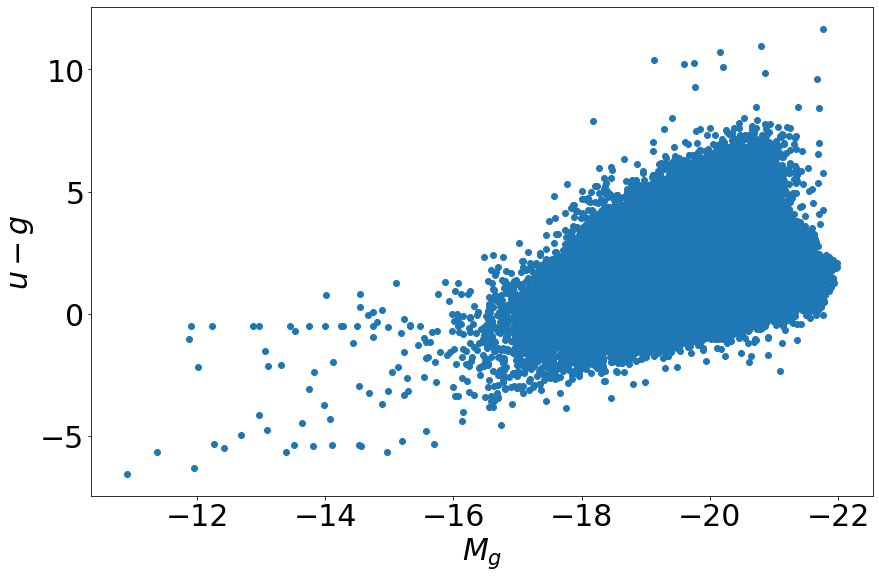

In [ ]:
matplotlib.rcParams.update({'font.size': 30}) 
plt.figure(figsize=(14,9))
plt.scatter(df['Mg'],df['u-g'])
plt.xlabel('$M_{g}$')
plt.ylabel('$u-g$')
plt.gca().invert_xaxis()
plt.show()
plt.close()

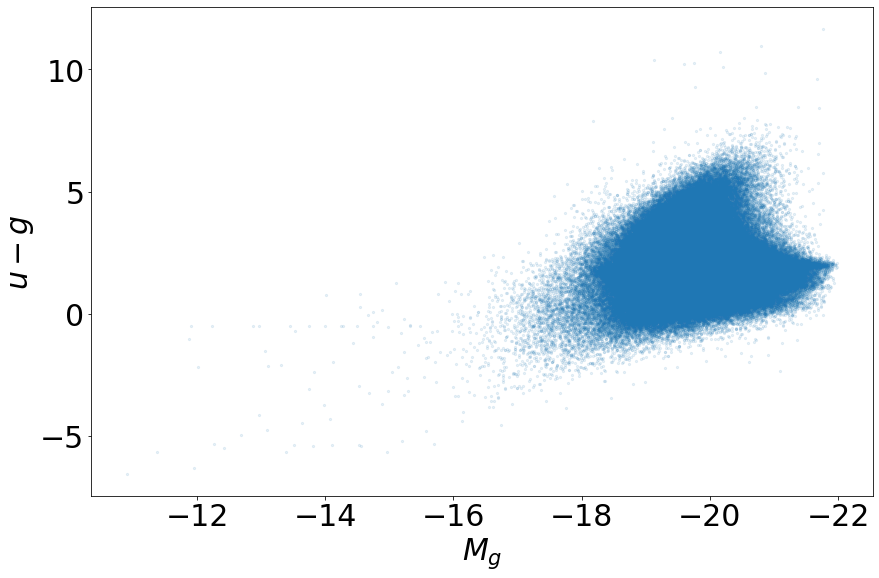

In [ ]:
matplotlib.rcParams.update({'font.size': 30}) 
plt.figure(figsize=(14,9))
plt.scatter(df['Mg'],df['u-g'],alpha=0.1,s=5)
plt.xlabel('$M_{g}$')
plt.ylabel('$u-g$')
plt.gca().invert_xaxis()
plt.show()
plt.close()

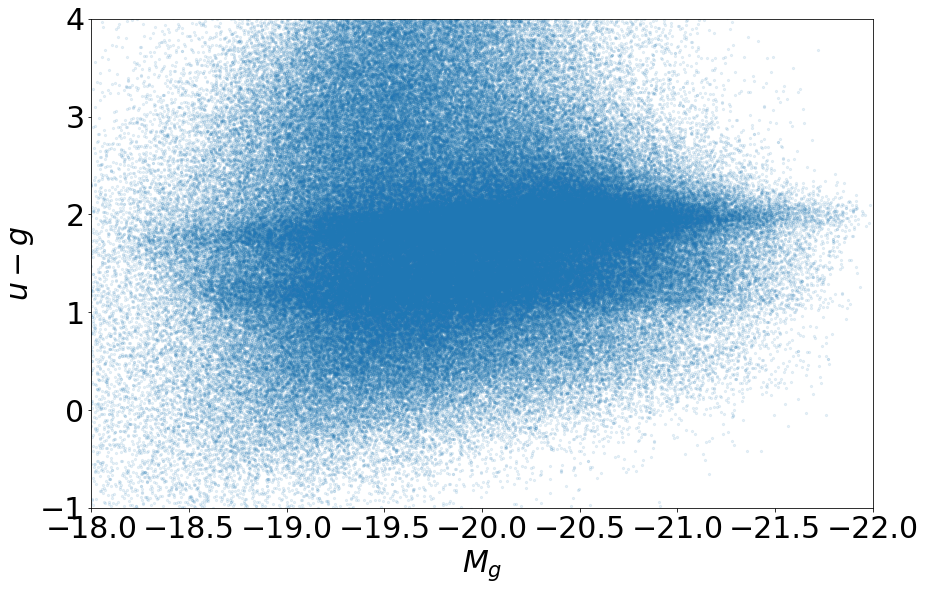

In [ ]:
matplotlib.rcParams.update({'font.size': 30}) 
plt.figure(figsize=(14,9))
plt.scatter(df['Mg'],df['u-g'],alpha=0.1,s=5)
plt.xlabel('$M_{g}$')
plt.ylabel('$u-g$')
plt.ylim([-1,4])
plt.xlim([-18,-22])
plt.show()
plt.close()

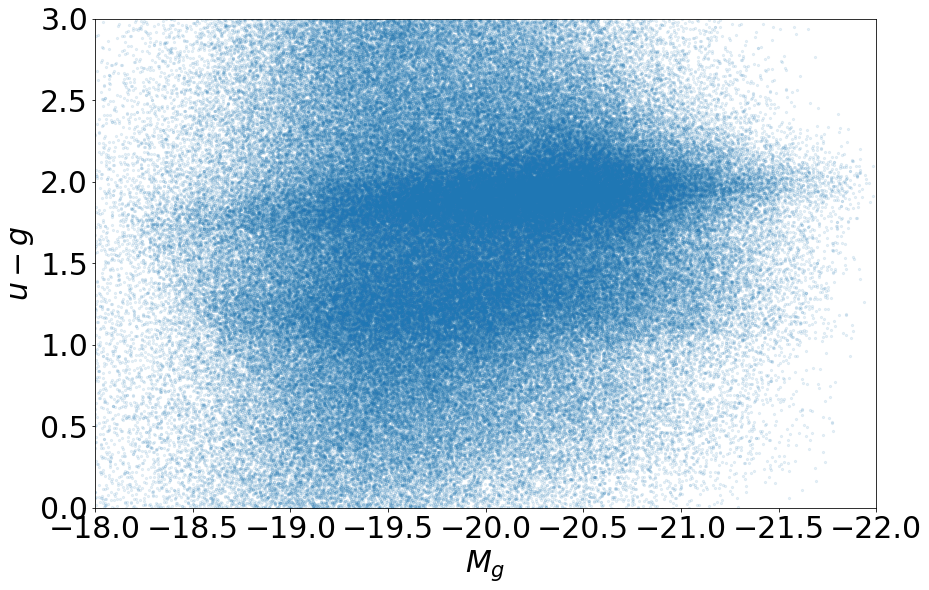

In [ ]:
matplotlib.rcParams.update({'font.size': 30}) 
plt.figure(figsize=(14,9))
plt.scatter(df['Mg'],df['u-g'],alpha=0.1,s=5)
plt.xlabel('$M_{g}$')
plt.ylabel('$u-g$')
plt.ylim([0,3])
plt.xlim([-18,-22])
plt.show()
plt.close()

Hagamos lo mismo con las otras combinaciones de colores, para ellos trabajaremos con subplots.

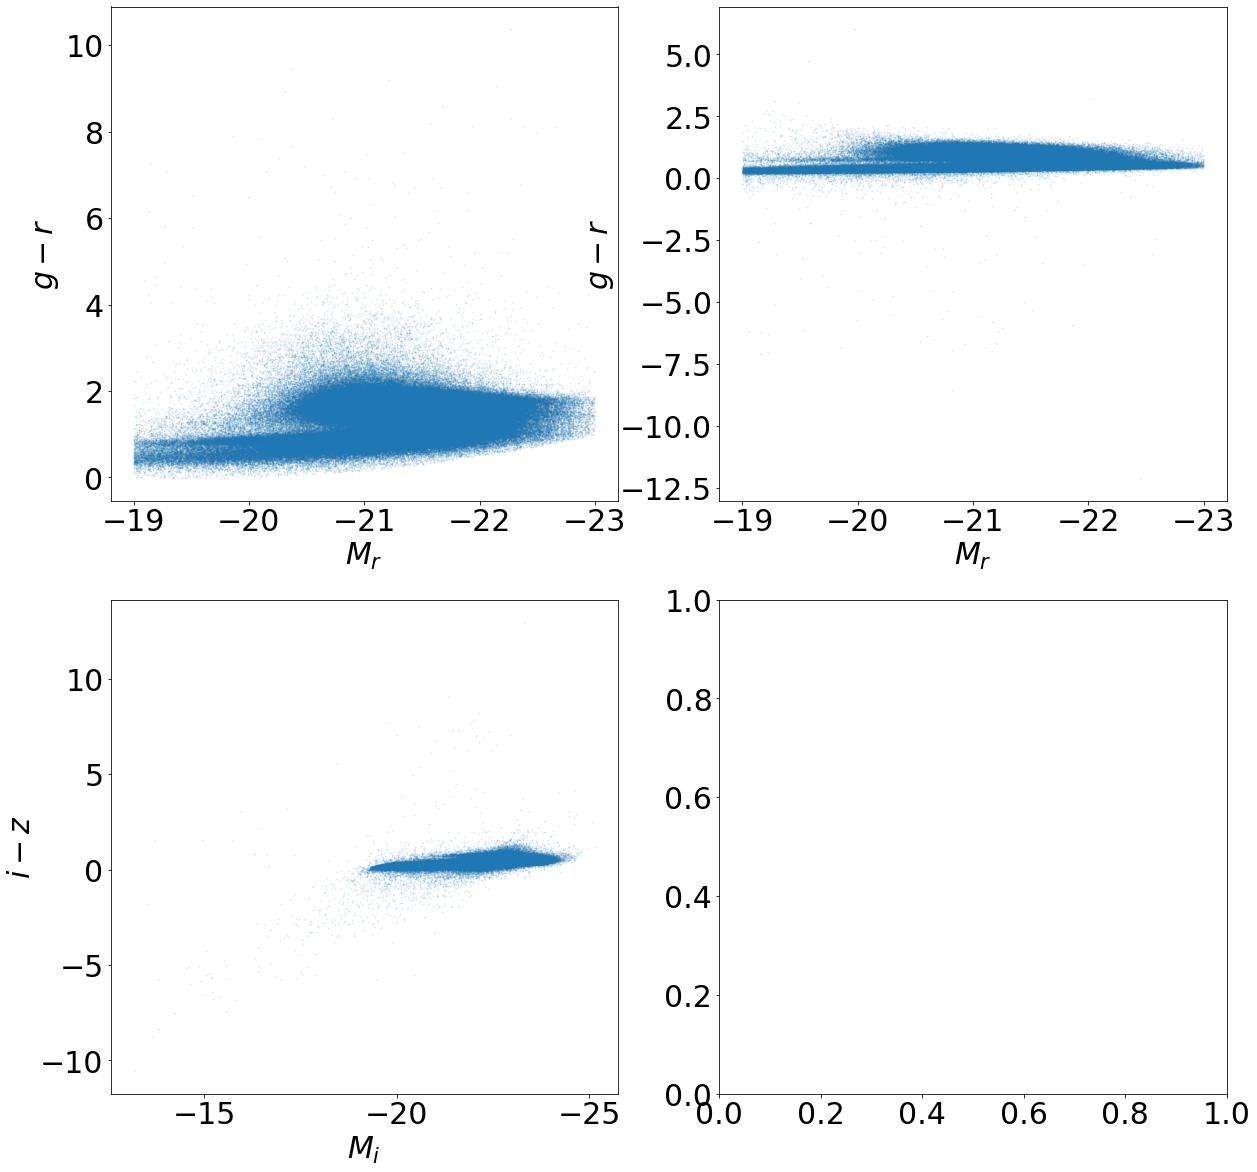

In [ ]:
fig, ax = plt.subplots(figsize = (20,20), nrows = 2, ncols=2)

ax[0][0].scatter(df['Mr'],df['g-r'],alpha=0.1,s=1)#, label = 'Cefeidas Tipo I', c = a_cep, alpha = 0.5)
ax[0][0].invert_xaxis()
ax[0][0].set_ylabel('$g-r$')
ax[0][0].set_xlabel(r'$M_r$')

ax[0][1].scatter(df['Mr'],df['r-i'],alpha=0.1,s=1)#, label = 'RR Lyrae', c = a_rrlyr, alpha = 0.5)
ax[0][1].invert_xaxis()
ax[0][1].set_ylabel('$g-r$')
ax[0][1].set_xlabel(r'$M_r$')

ax[1][0].scatter(df['Mz'],df['i-z'],alpha=0.1,s=1)#, label = 'RR Lyrae', c = a_rrlyr, alpha = 0.5)
ax[1][0].invert_xaxis()
ax[1][0].set_ylabel('$i-z$')
ax[1][0].set_xlabel(r'$M_i$')

plt.show()
plt.close()


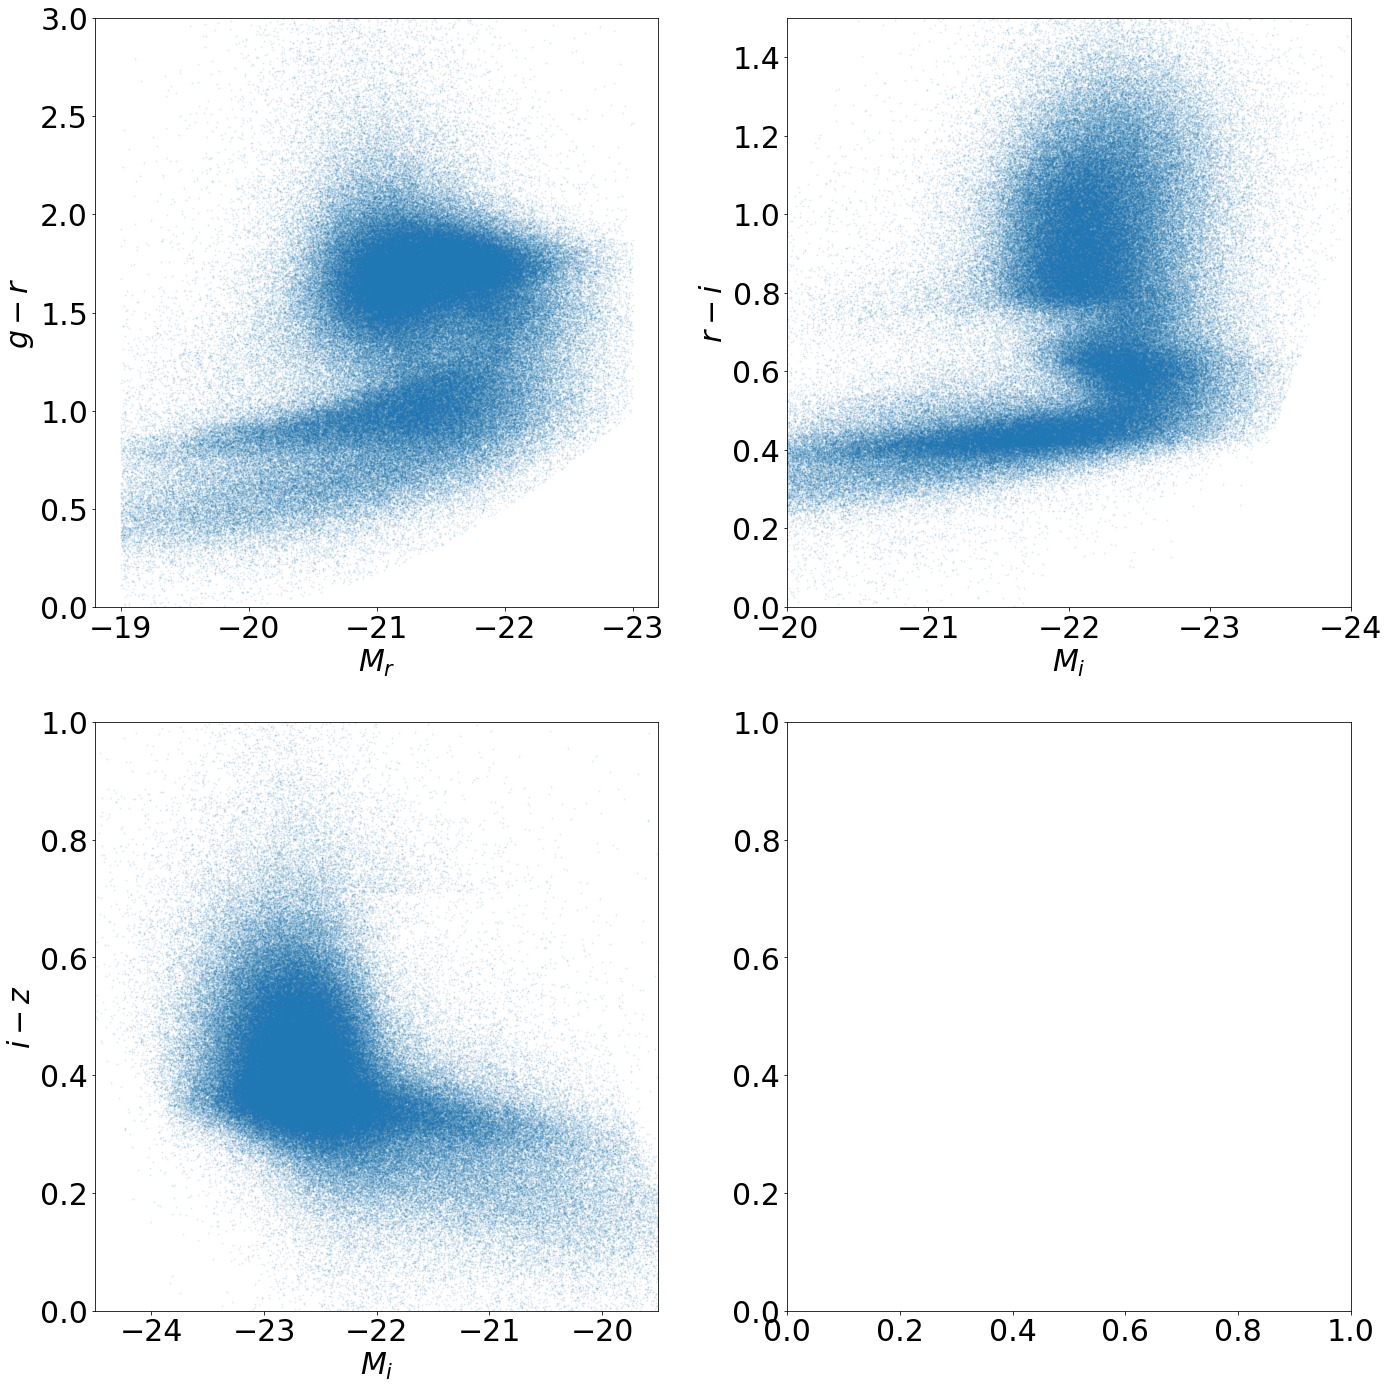

In [ ]:
fig, ax = plt.subplots(figsize = (20,20), nrows = 2, ncols=2)

ax[0][0].scatter(df['Mr'],df['g-r'],alpha=0.1,s=1)#, label = 'Cefeidas Tipo I', c = a_cep, alpha = 0.5)
ax[0][0].invert_xaxis()
ax[0][0].set_ylim([0,3])
ax[0][0].set_ylabel('$g-r$')
ax[0][0].set_xlabel(r'$M_r$')

ax[0][1].scatter(df['Mi'],df['r-i'],alpha=0.1,s=1)#, label = 'RR Lyrae', c = a_rrlyr, alpha = 0.5)
ax[0][1].set_ylim([0,1.5])
ax[0][1].set_xlim([-20,-24])
ax[0][1].set_ylabel('$r-i$')
ax[0][1].set_xlabel(r'$M_i$')

ax[1][0].scatter(df['Mz'],df['i-z'],alpha=0.1,s=1)#, label = 'RR Lyrae', c = a_rrlyr, alpha = 0.5)
ax[1][0].set_xlim([-19.5,-24.5])
ax[1][0].set_ylim([0,1])
ax[1][0].invert_xaxis()
ax[1][0].set_ylabel('$i-z$')
ax[1][0].set_xlabel(r'$M_i$')

plt.tight_layout()
plt.show()
plt.close()

##**Paso 7: Separación de grupos**
Claramente se distinguen al menos dos grupos, trataremos de separarlos utilizando el polinomio de segundo orden, $g-r = \frac{M_r ^2}{12} + \frac{13 M_r}{4} + \frac{98}{3}$ para realizar la separación.

In [ ]:
df_a = df[df['g-r'] >= (1/12.)*df['Mr']**2 + (13/4.)*df['Mr'] + 98/3.]
df_b = df[df['g-r'] < (1/12.)*df['Mr']**2 + (13/4.)*df['Mr'] + 98/3.]

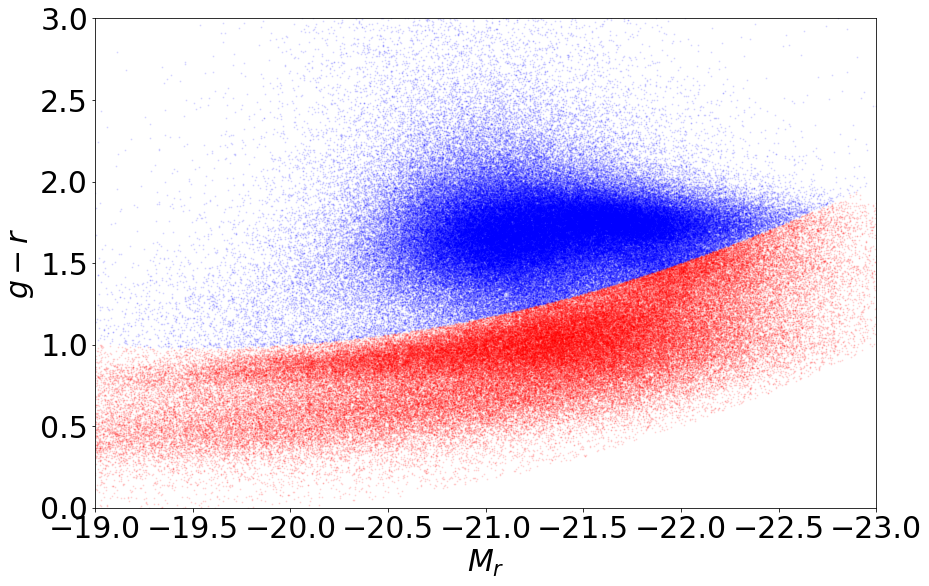

In [ ]:
matplotlib.rcParams.update({'font.size': 30}) 
plt.figure(figsize=(14,9))
plt.scatter(df_a['Mr'],df_a['g']-df_a['r'],alpha=0.1,s=1,c='blue')
plt.scatter(df_b['Mr'],df_b['g']-df_b['r'],alpha=0.1,s=1,c='red')
plt.xlabel('$M_{r}$')
plt.ylabel('$g-r$')
plt.gca().set_ylim([0,3])
plt.gca().set_xlim([-19,-23])
plt.show()
plt.close()

##**Conclusiones**

En realidad resulta que las galaxias si se pueden clasificar en un diagrama color-magnitud. El siguiente gráfico muestra su clasificación.

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f9/Galaxy_color-magnitude_diagram.jpg" width="600"
         height="550">


Se clasifican las galaxias en la parte de "arriba" del gráfico como galaxias en la secuencia roja, estas galaxias son galaxias viejas, de forma elíptica que carecen de formación estelar. 

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d3/Abell_S740%2C_cropped_to_ESO_325-G004.jpg" width="600"
         height="550">


Se clasifican las galaxias en la parte de "abajo" como galaxias en la nube azul, estas galaxias son galaxias jóvenes, de forma espiral, éstas están activamente formando nuevas estrellas, razón por la cual son más azules.

<img src="https://cdn.mos.cms.futurecdn.net/wWieWanunf3ct2xtaEVAwY-650-80.jpg.webp" width="600"
         height="550">

Se clasifican las galaxias en la parte del "medio" como galaxias en el valle verde, estas son galaxias que están transicionando de la nube azul a la secuencia roja. Un ejemplo son las "espirales rojas", galaxias que todavía mantienen su forma espiral, pero ya no están formando estrellas.

<img src="https://www.universetoday.com/wp-content/uploads/2013/08/M33_FinalMasterChumackHRweb.jpg" width="600"
         height="550">

Actualmente hay mucha gente trabajando en este tópico y descubriendo nuevos hallazgos. El proyecto **GALAXY ZOO** (Schawinski et al 2014.), cuyo propósito es la participación ciudadana en la clasificación de galaxias liberó esta imagen presentando "cómo lucen" las galaxias de cada categoría.

<img src="https://galaxyzooblog.files.wordpress.com/2014/02/examples.png" width="1000"
         height="550">

Dentro de esta investiación se muestra como las diferentes estapas del valle verde lucen. Esta subclasificación yace en la cercanía que poseen con las galaxias de la nube roja o la secuencia roja. En la siguiente imagen se puede apreciar ambas subclasificaciones . **OJO:** El diagrama que se muestra abajo NO es un diagrama color-magnitud, es un diagrama **color-color**.

<img src="https://raw.githubusercontent.com/astrodatos/Clase4/master/green.png">


